# StackOverflow Survey Data Analysis

## A Look at the Data

In order to get a better understanding of the data, some of the characteristics of the dataset will be explored as follows.

1. Number of rows and columns in this dataset.
2. Provide a set of column names that have no missing values.
3. Which columns have the most missing values? Provide a set of column names that have more than 75% of their values missing.
4. Provide a pandas series of the different **Professional** status values in the dataset along with the count of the number of individuals with each status.
5. Provide a pandas series of the different FormalEducation status values in the dataset along with the count of how many individuals received that formal education.
6. Provide a pandas series of the different Country values in the dataset along with the count of how many individuals are from each country. 

In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helper as h


os.chdir("projects_on_GitHub/cases/SurveyDataAnalysis")

In [86]:
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 1. Number of rows and columns in the dataset
print("There are {} rows and {} columns in the dataset.".format(df.shape[0], df.shape[1]))

There are 19102 rows and 154 columns in the dataset.


In [4]:
# 2. Provide a set of column names that have no missing values.
no_nulls = set(df.columns[df.isnull().sum()==0])
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [5]:
# Find columns with the most null values
na_max = df.isna().sum().max()
df.columns[df.isna().sum()==na_max]

Index(['ExCoderNotForMe', 'ExCoderWillNotCode'], dtype='object')

In [6]:
# For check purpose
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Data columns (total 154 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    Respondent                        19102 non-null  int64  
 1    Professional                      19102 non-null  object 
 2    ProgramHobby                      19102 non-null  object 
 3    Country                           19102 non-null  object 
 4    University                        19102 non-null  object 
 5    EmploymentStatus                  19102 non-null  object 
 6    FormalEducation                   19102 non-null  object 
 7    MajorUndergrad                    15899 non-null  object 
 8    HomeRemote                        16471 non-null  object 
 9    CompanySize                       14653 non-null  object 
 10   CompanyType                       14609 non-null  object 
 11   YearsProgram                      19005 non-null  ob

In [7]:
# 3. Provide a set of column names that have more than 75% of their values missing.
nulls_75plus = set(df.columns[df.isna().mean() >= .75])
nulls_75plus

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

In [8]:
# 4. Professional status value counts
## Check null values in `Professional` feature
df.Professional.isna().sum()

0

In [9]:
status_vals = df.Professional.value_counts(dropna=False, normalize=True, ascending=True)
status_vals

Used to be a professional developer                     0.018689
None of these                                           0.019265
Professional non-developer who sometimes writes code    0.093289
Student                                                 0.147681
Professional developer                                  0.721076
Name: Professional, dtype: float64

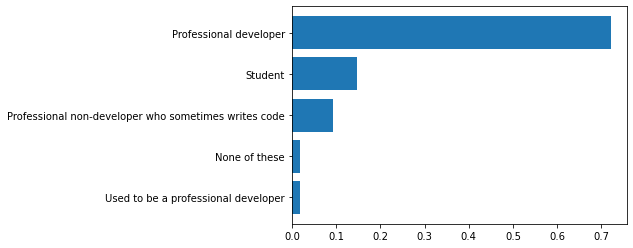

In [10]:
# Visualization for Q4
plt.barh(y=status_vals.index.values, width=status_vals.values);

In [11]:
# 5. `FormalEducation` value counts
## Check null values in `FormalEducation` feature
df.FormalEducation.isna().sum()

0

In [12]:
def viz_freq(feature_name, top_k=None, norm=None, asc=False):
    if top_k is None:
        val_counts = df[feature_name].value_counts(normalize=norm, ascending=asc)
        print(val_counts)
        plt.barh(y=val_counts.index.values, width=val_counts.values);
        
    else:
        val_counts = df[feature_name].value_counts(normalize=norm, ascending=asc)
        top_k_vals = val_counts[-top_k:]
        print(top_k_vals)
        plt.barh(y=top_k_vals.index.values, width=top_k_vals.values);

I never completed any formal education                               0.007591
Professional degree                                                  0.013349
Primary/elementary school                                            0.021150
I prefer not to answer                                               0.021411
Doctoral degree                                                      0.028845
Secondary school                                                     0.116585
Some college/university study without earning a bachelor's degree    0.150194
Master's degree                                                      0.216888
Bachelor's degree                                                    0.423987
Name: FormalEducation, dtype: float64


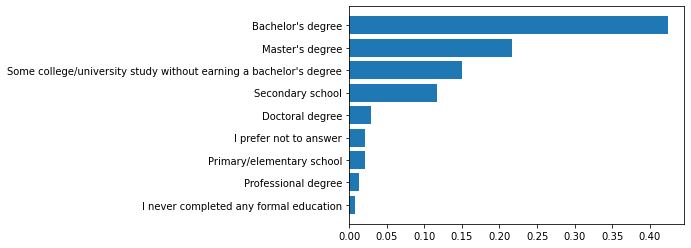

In [13]:
viz_freq("FormalEducation", norm=True, asc=True)

In [14]:
# 6. `Country` value counts
## Check null values in `FormalEducation` feature
df.Country.isna().sum()

0

Ivory Coast (Cote D'Ivoire)    0.000052
Qatar                          0.000052
Libya                          0.000052
Sudan                          0.000052
Vatican City State             0.000052
                                 ...   
Canada                         0.045754
Germany                        0.069993
United Kingdom                 0.074547
India                          0.081510
United States                  0.228458
Name: Country, Length: 165, dtype: float64


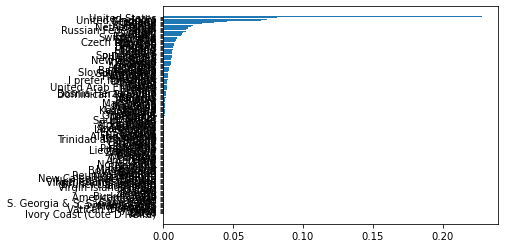

In [15]:
viz_freq("Country", norm=True, asc=True)

Israel            0.017694
Netherlands       0.019527
Australia         0.020888
France            0.027327
Poland            0.036331
Canada            0.045754
Germany           0.069993
United Kingdom    0.074547
India             0.081510
United States     0.228458
Name: Country, dtype: float64


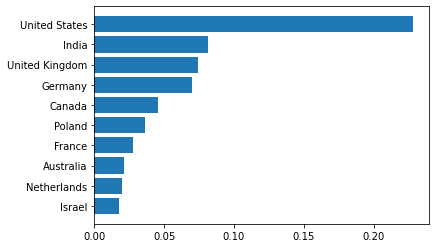

In [16]:
viz_freq("Country", top_k=10, norm=True, asc=True)

___I wrap the function above in a `helper.py` script under root folder.___

Used to be a professional developer                     0.018689
None of these                                           0.019265
Professional non-developer who sometimes writes code    0.093289
Student                                                 0.147681
Professional developer                                  0.721076
Name: Professional, dtype: float64


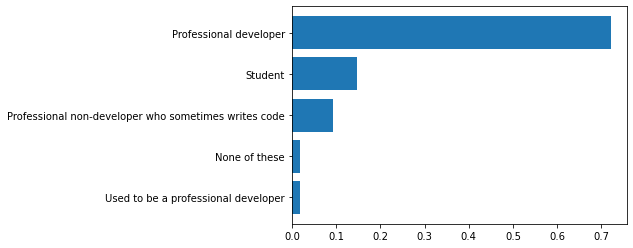

In [18]:
h.viz_freq(df, "Professional", norm=True, asc=True)

I never completed any formal education                               0.007591
Professional degree                                                  0.013349
Primary/elementary school                                            0.021150
I prefer not to answer                                               0.021411
Doctoral degree                                                      0.028845
Secondary school                                                     0.116585
Some college/university study without earning a bachelor's degree    0.150194
Master's degree                                                      0.216888
Bachelor's degree                                                    0.423987
Name: FormalEducation, dtype: float64


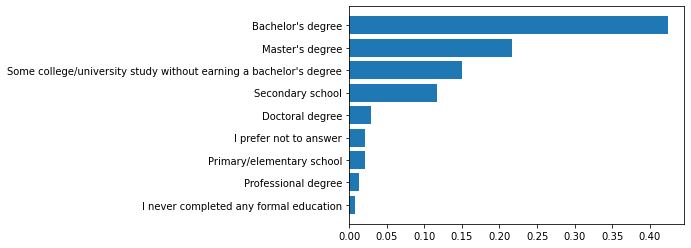

In [20]:
h.viz_freq(df, "FormalEducation", norm=True, asc=True)

Israel            0.017694
Netherlands       0.019527
Australia         0.020888
France            0.027327
Poland            0.036331
Canada            0.045754
Germany           0.069993
United Kingdom    0.074547
India             0.081510
United States     0.228458
Name: Country, dtype: float64


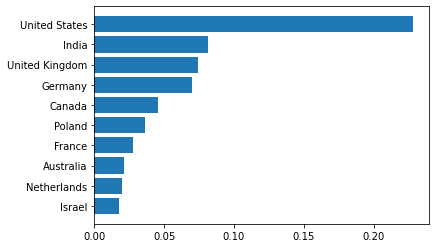

In [21]:
# Country
h.viz_freq(df, "Country", top_k=10, norm=True, asc=True)

## How to break into the field?

The ___following questions___ will be explored in this section.

**1.**  Use the **schema** dataset to answer this question.  Write a function called **get_description** that takes the **schema dataframe** and the **column** as a string, and returns a string of the description for that column.

**2.** In order to understand how to break into the field, we will look at the **CousinEducation** field. Provide a pandas series of the different **CousinEducation** status values in the dataset. 

**3.** Whether some of the individuals might have bias towards their own degrees? Analyze elements of the **FormalEducation** column in **df**. 

**4.** Now we would like to find out if the proportion of individuals who completed one of these three programs feel differently than those that did not. Store a dataframe of only the individual's who had **HigherEd** equal to 1 in **ed_1**.  Similarly, store a dataframe of only the **HigherEd** equal to 0 values in **ed_0**.

Notice, you have already created the **HigherEd** column using the check code portion above, so here you only need to subset the dataframe using this newly created column.

**5.** What can you conclude from the above plot?  Change the dictionary to mark **True** for the keys of any statements you can conclude, and **False** for any of the statements you cannot conclude.

In [3]:
# import `schema` data
schema = pd.read_csv('./survey_results_schema.csv')
schema

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
...,...,...
149,QuestionsInteresting,The questions were interesting
150,QuestionsConfusing,The questions were confusing
151,InterestedAnswers,I'm interested in learning how other developer...
152,Salary,"What is your current annual base salary, befor..."


**1.** Create a function to check full meaning for each feature.

This function has been wrapped into `helper.py`


In [92]:
import importlib
importlib.reload(h)

<module 'helper' from '/Users/alejandrosanz/Downloads/projects_on_GitHub/cases/SurveyDataAnalysis/helper.py'>

In [19]:
h.get_description(schema, 'CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

**2.** Provide a pandas series of the different `CousinEducation` status values in the dataset.

In [22]:
df.CousinEducation.sample(10)

9621     Get a job as a QA tester; Contribute to open s...
12911    Take online courses; Bootcamp; Part-time/eveni...
14190                                                  NaN
17057    Take online courses; Buy books and work throug...
17356    Take online courses; Part-time/evening courses...
15556    Take online courses; Bootcamp; Buy books and w...
13696                                                  NaN
2769                                                   NaN
2233                                                   NaN
4634                                                   NaN
Name: CousinEducation, dtype: object

In [23]:
df.CousinEducation.isna().sum()

12196

**Characteristics of data in `CousinEducation` feature:**

- Multiple items separated by semi-colon
- Lots of null values

So I'm considering to extract each education status from each record and count. If not, we will get the following result which is helpless for our analysis.

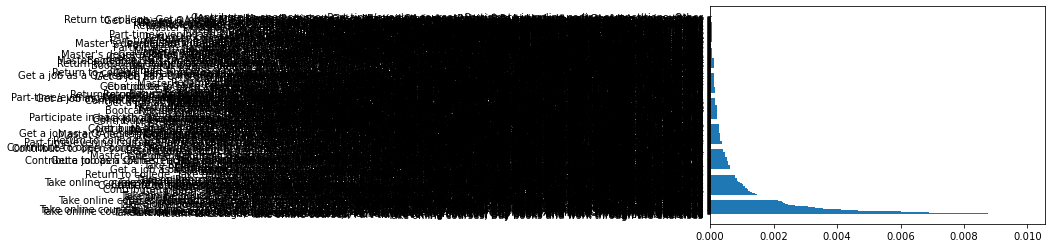

In [25]:
cous_ed_vals = df.CousinEducation.value_counts()/df.shape[0]
plt.barh(y=cous_ed_vals.index, width=cous_ed_vals.values);

In [26]:
couEduSplit = df[df.CousinEducation.notna()].CousinEducation.str.split('; ', n=-1, expand=True)
couEduSplit

,0,1,2,3
7,Get a job as a QA tester,None,None,None
18,Get a job as a QA tester,Conferences/meet-ups,None,None
23,Take online courses,Contribute to open source,Buy books and work through the exercises,Conferences/meet-ups
32,Contribute to open source,Buy books and work through the exercises,Other,None
33,Take online courses,Contribute to open source,Part-time/evening courses,None
...,...,...,...,...
19094,Return to college,Take online courses,Contribute to open source,Part-time/evening courses
19096,Master's degree,Take online courses,Contribute to open source,Conferences/meet-ups
19097,Contribute to open source,Bootcamp,Part-time/evening courses,Conferences/meet-ups
19098,Take online courses,Part-time/evening courses,Participate in online coding competitions,Buy books and work through the exercises


In [27]:
c0 = couEduSplit[0].value_counts().sort_index()
c1 = couEduSplit[1].value_counts().sort_index()
c2 = couEduSplit[2].value_counts().sort_index()
c3 = couEduSplit[3].value_counts().sort_index()

pd.concat([c0, c1, c2, c3], axis=1)

,0,1,2,3
Bootcamp,154,819.0,540.0,56.0
Buy books and work through the exercises,138,640.0,1339.0,1305.0
Conferences/meet-ups,20,106.0,399.0,1013.0
Contribute to open source,552,1369.0,372.0,25.0
Get a job as a QA tester,776,238.0,22.0,NaN
Master's degree,504,268.0,NaN,NaN
None of these,181,NaN,NaN,NaN
Other,91,136.0,143.0,210.0
Part-time/evening courses,114,739.0,1067.0,261.0
Participate in hackathons,40,221.0,391.0,91.0


In [28]:
cc = pd.concat([c0, c1, c2, c3], axis=1).sum(axis=1)
cc

Bootcamp                                     1569.0
Buy books and work through the exercises     3422.0
Conferences/meet-ups                         1538.0
Contribute to open source                    2318.0
Get a job as a QA tester                     1036.0
Master's degree                               772.0
None of these                                 181.0
Other                                         580.0
Part-time/evening courses                    2181.0
Participate in hackathons                     743.0
Participate in online coding competitions     999.0
Return to college                            1469.0
Take online courses                          4440.0
dtype: float64

In [42]:
possible_methods = cc.index.to_list()
possible_methods

['Bootcamp',
 'Buy books and work through the exercises',
 'Conferences/meet-ups',
 'Contribute to open source',
 'Get a job as a QA tester',
 "Master's degree",
 'None of these',
 'Other',
 'Part-time/evening courses',
 'Participate in hackathons',
 'Participate in online coding competitions',
 'Return to college',
 'Take online courses']

In [31]:
cc_relative = (cc/cc.sum()).sort_values()
cc_relative

None of these                                0.008518
Other                                        0.027297
Participate in hackathons                    0.034968
Master's degree                              0.036333
Participate in online coding competitions    0.047016
Get a job as a QA tester                     0.048758
Return to college                            0.069136
Conferences/meet-ups                         0.072383
Bootcamp                                     0.073842
Part-time/evening courses                    0.102645
Contribute to open source                    0.109093
Buy books and work through the exercises     0.161050
Take online courses                          0.208961
dtype: float64

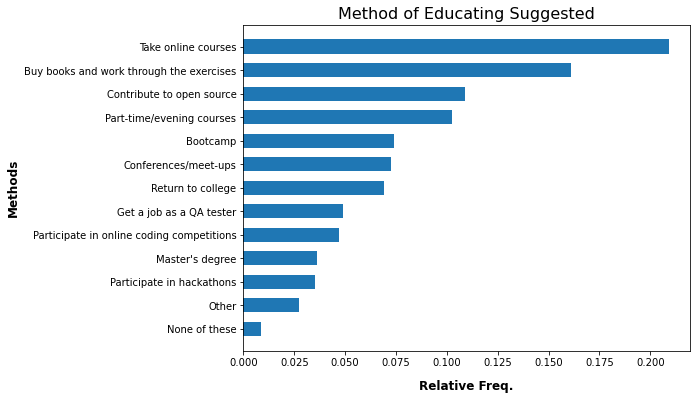

In [51]:
plt.figure(figsize=(8, 6))
plt.barh(cc_relative.index, cc_relative.values, height=.6)

plt.title("Method of Educating Suggested", fontsize=16)
plt.ylabel("Methods", fontweight='bold', fontsize=12)
plt.xlabel('Relative Freq.', fontweight='bold', fontsize=12, labelpad=12);

Take online courses                          0.208961
Buy books and work through the exercises     0.161050
Contribute to open source                    0.109093
Part-time/evening courses                    0.102645
Bootcamp                                     0.073842
Conferences/meet-ups                         0.072383
Return to college                            0.069136
Get a job as a QA tester                     0.048758
Participate in online coding competitions    0.047016
Master's degree                              0.036333
Participate in hackathons                    0.034968
Other                                        0.027297
None of these                                0.008518
dtype: float64


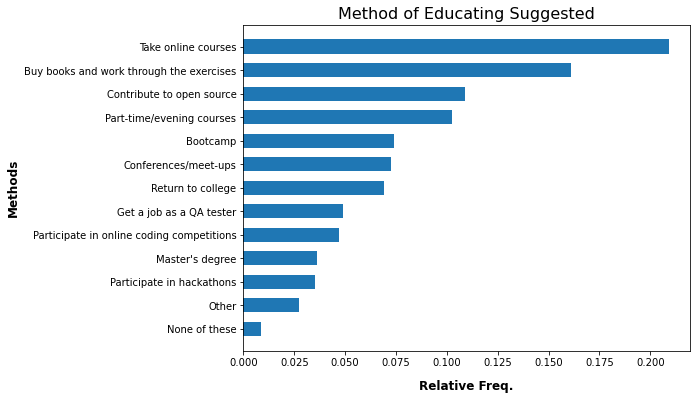

In [63]:
# Wrap the process above into a function in `helper.py`
h.method_suggested_count(df)

**3.** Whether some of the individuals might have bias towards their own degrees?

In the following, I encode all the records of `FormalEducation` column which are within `[Master's degree", "Doctoral", "Professional degree]` as `higher_ed` (higher-education-level).

In [79]:
# def higher_ed_mapping(df, edu_levels):
#     df['higher_ed'] = df.FormalEducation.isin(edu_levels).astype('int')
#     prop = df['higher_ed'].mean()
#     return df, prop
    
# df, prop = higher_ed_mapping(df, ["Master's degree", "Doctoral", "Professional degree"])
# print("About {:.2%} of respondents have higher education degrees.".format(prop))

About 23.02% of respondents have higher education degrees.


In [93]:
df, prop = h.higher_ed_mapping(df, ["Master's degree", "Doctoral", "Professional degree"])

In [94]:
df[['FormalEducation', 'higher_ed']]

,FormalEducation,higher_ed
0,Secondary school,0
1,Some college/university study without earning ...,0
2,Bachelor's degree,0
3,Doctoral degree,0
4,Master's degree,1
...,...,...
19097,Bachelor's degree,0
19098,Secondary school,0
19099,Bachelor's degree,0
19100,Some college/university study without earning ...,0


In [ ]:
# # Alternative method for 
# def higher_ed_mapping1(formal_ed_str):
#     if formal_ed_str in ["Master's degree", "Doctoral", "Professional degree"]:
#         return 1
#     else:
#         return 0
    
# # df['higher_ed1'] = df.FormalEducation.apply(higher_ed_mapping1)

## Explore `Job Satisfaction` Feature

The ___following questions___ will be explored in this section.

**1.** The proportion of missing values in the Job Satisfaction column.

**2.** According to EmploymentStatus, which group has the highest average job satisfaction?

**3.** In general, do smaller companies appear to have employees with higher job satisfaction?

**4.** Do individuals who program outside of work appear to have higher JobSatisfaction?

**5.** Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?

**6.** A friend says a Doctoral degree increases the chance of having job you like, does this seem true?

## Predict `Salary`

### Data Preprocessing

**1.** Dealing with Missing Values.

**2.** Imputation Techniques.

**3.** Dealing with Categorical Features.


### Use Linear Regression Model to Predict `Salary`